In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import re
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import KFold
import pydot
import nltk
import graphviz
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_all = pd.read_csv("export_TweetSentBR.csv")
df_all.shape

(11570, 4)

In [3]:
df_all.head()

,id,id_twitter,text,sentiment
0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1


In [4]:
len(df_all[df_all["sentiment"] == "-"]['text'])

37

In [5]:
df_remove = df_all[df_all['sentiment'] == '-']
df_all = df_all.drop(df_remove.index)

In [6]:
df_all.isnull().sum()

id            0
id_twitter    0
text          0
sentiment     0
dtype: int64

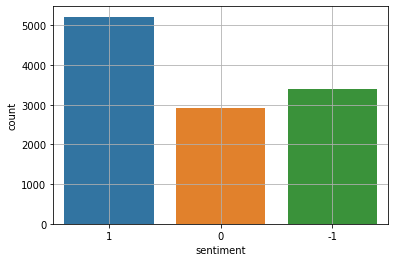

In [7]:
df_all = df_all.dropna()
sns.countplot(data=df_all, x='sentiment')
plt.grid()

In [8]:
df_all = df_all.reset_index()
df_all

,index,id,id_twitter,text,sentiment
0,0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1
...,...,...,...,...,...
11528,11565,12908,864636619000877056,eu ja to aqui pronto pro #MasterChefBR mas ain...,-1
11529,11566,12909,863581588713603072,MALUCO! Uma coisa que eu não tenho coragem é e...,-1
11530,11567,12910,864831041349054464,#MaisVoce @ANAMARIABRAGA está linda @RedeGlobo,1
11531,11568,12911,863042798575951872,"Que orgulho de ti, @sportrecife! #Encontro",1


In [9]:
df_all = df_all.drop(columns=['index'])
df_all['sentiment'].unique()

array(['1', '0', '-1'], dtype=object)

In [10]:
df_all['sentiment'] = df_all['sentiment'].apply(lambda x: int(x))

In [11]:
Tweet = df_all['text']
polarity = np.asarray(df_all['sentiment'])

np.unique(polarity)

array([-1,  0,  1], dtype=int64)

In [12]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(11533, 13064)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.65      0.50      0.56      1009
           0       0.74      0.12      0.21       868
           1       0.59      0.94      0.72      1583

    accuracy                           0.61      3460
   macro avg       0.66      0.52      0.50      3460
weighted avg       0.64      0.61      0.55      3460



In [16]:
kf = KFold(n_splits=10)
clf = MultinomialNB()
lista = []
for train_index, test_index in kf.split(X_train_transform):
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append(clf.score(X_test, y_test))
    
    print(clf.score(X_test, y_test))
    
print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}  ')

0.6421143847487002
0.6542461005199307
0.6169844020797227
0.6287944492627927
0.5672159583694709
0.5368603642671292
0.6071118820468343
0.6591500433651344
0.5646140503035559
0.5897658282740676
 Média: 0.6066857463237338 	 Std: 0.03918478811601816  


In [14]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [15]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [20]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

In [21]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<8073x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 56353 stored elements in Compressed Sparse Row format>

In [22]:
X_test

<3460x15346 sparse matrix of type '<class 'numpy.float64'>'
	with 24020 stored elements in Compressed Sparse Row format>

In [23]:
one = OneHotEncoder(sparse=False)

In [24]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_test = one.transform(Y_test.reshape(-1,1))

In [25]:
fit = model.fit(X_train.todense(), y_one, epochs=10, validation_data=(X_test.todense(), y_one_test))

Epoch 1/10
253/253 [==============================] - 2s 6ms/step - loss: 1.0057 - accuracy: 0.4877 - val_loss: 0.9040 - val_accuracy: 0.5610
Epoch 2/10
253/253 [==============================] - 1s 5ms/step - loss: 0.7449 - accuracy: 0.6815 - val_loss: 0.8438 - val_accuracy: 0.6159
Epoch 3/10
253/253 [==============================] - 1s 5ms/step - loss: 0.4691 - accuracy: 0.8286 - val_loss: 0.9369 - val_accuracy: 0.6000
Epoch 4/10
253/253 [==============================] - 1s 6ms/step - loss: 0.2899 - accuracy: 0.9072 - val_loss: 1.0887 - val_accuracy: 0.5919
Epoch 5/10
253/253 [==============================] - 1s 5ms/step - loss: 0.1858 - accuracy: 0.9417 - val_loss: 1.2399 - val_accuracy: 0.6029
Epoch 6/10
253/253 [==============================] - 1s 5ms/step - loss: 0.1389 - accuracy: 0.9594 - val_loss: 1.3981 - val_accuracy: 0.5858
Epoch 7/10
253/253 [==============================] - 1s 6ms/step - loss: 0.1041 - accuracy: 0.9690 - val_loss: 1.5223 - val_accuracy: 0.5751
Epoch 

In [26]:
predicted = model.predict(X_test.todense())

print(classification_report(np.argmax(y_one_test, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       995
           1       0.43      0.39      0.40       911
           2       0.69      0.66      0.67      1554

    accuracy                           0.58      3460
   macro avg       0.55      0.56      0.55      3460
weighted avg       0.58      0.58      0.58      3460



In [27]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X_train_transform):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train_one, epochs=5, validation_data=(X_test.todense(), y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
325/325 [==============================] - 2s 6ms/step - loss: 0.9909 - accuracy: 0.5053 - val_loss: 0.8253 - val_accuracy: 0.6326
Epoch 2/5
325/325 [==============================] - 2s 5ms/step - loss: 0.6844 - accuracy: 0.7297 - val_loss: 0.8459 - val_accuracy: 0.6239
Epoch 3/5
325/325 [==============================] - 2s 6ms/step - loss: 0.4234 - accuracy: 0.8541 - val_loss: 0.9860 - val_accuracy: 0.6057
Epoch 4/5
325/325 [==============================] - 2s 5ms/step - loss: 0.2754 - accuracy: 0.9127 - val_loss: 1.1397 - val_accuracy: 0.6075
Epoch 5/5
325/325 [==============================] - 2s 5ms/step - loss: 0.1831 - accuracy: 0.9432 - val_loss: 1.3067 - val_accuracy: 0.5927
 
Iter:  2
 
Epoch 1/5
325/325 [==============================] - 2s 5ms/step - loss: 0.9959 - accuracy: 0.5011 - val_loss: 0.8538 - val_accuracy: 0.6334
Epoch 2/5
325/325 [==============================] - 2s 5ms/step - loss: 0.7229 - accuracy: 0.6935 - val_loss: 0.8410 - val_accura

In [28]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    lista = []
    for i in range(len(matrix_acc)):
        lista.append(matrix_acc[i][-1])
        print(f' Fold: {i}\t Ultimo valor acc: {lista[i]}')
    print("")
    print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}')
        
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.5927209854125977
 Fold: 1	 Ultimo valor acc: 0.5857885479927063
 Fold: 2	 Ultimo valor acc: 0.6247833371162415
 Fold: 3	 Ultimo valor acc: 0.6045099496841431
 Fold: 4	 Ultimo valor acc: 0.5819600820541382
 Fold: 5	 Ultimo valor acc: 0.6097137928009033
 Fold: 6	 Ultimo valor acc: 0.6097137928009033
 Fold: 7	 Ultimo valor acc: 0.6322636604309082
 Fold: 8	 Ultimo valor acc: 0.585429310798645
 Fold: 9	 Ultimo valor acc: 0.6001734733581543

 Média: 0.6027056932449341 	 Std: 0.01607397943508015


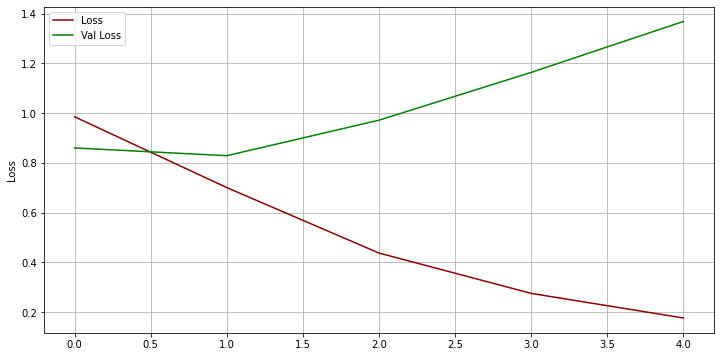

In [29]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

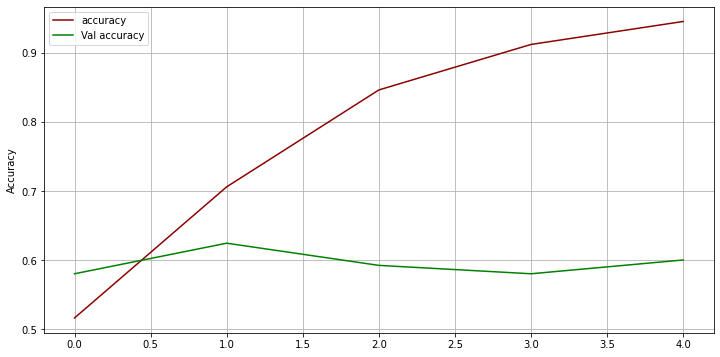

In [30]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [33]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['text'])))

vocab = set_array(df_all['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [63]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [65]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_test = one.transform(Y_test.reshape(-1,1))

In [66]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/10
64/64 [==============================] - 8s 125ms/step - loss: 1.0801 - accuracy: 0.4479 - val_loss: 1.0256 - val_accuracy: 0.5092
Epoch 2/10
64/64 [==============================] - 7s 107ms/step - loss: 0.9303 - accuracy: 0.5672 - val_loss: 0.9141 - val_accuracy: 0.5717
Epoch 3/10
64/64 [==============================] - 7s 104ms/step - loss: 0.7277 - accuracy: 0.6974 - val_loss: 0.9253 - val_accuracy: 0.5818
Epoch 4/10
64/64 [==============================] - 6s 101ms/step - loss: 0.5415 - accuracy: 0.8148 - val_loss: 1.0201 - val_accuracy: 0.5855
Epoch 5/10
64/64 [==============================] - 7s 103ms/step - loss: 0.4123 - accuracy: 0.8692 - val_loss: 1.1077 - val_accuracy: 0.5882
Epoch 6/10
64/64 [==============================] - 7s 104ms/step - loss: 0.3169 - accuracy: 0.9023 - val_loss: 1.2617 - val_accuracy: 0.5766
Epoch 7/10
64/64 [==============================] - 7s 104ms/step - loss: 0.2548 - accuracy: 0.9275 - val_loss: 1.3317 - val_accuracy: 0.5853
Epoch 

In [67]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_test, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56      1000
           1       0.41      0.43      0.42       854
           2       0.67      0.70      0.68      1606

    accuracy                           0.58      3460
   macro avg       0.56      0.55      0.56      3460
weighted avg       0.58      0.58      0.58      3460



In [44]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train, y_train_one, epochs=5, validation_data=(X_test, y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
325/325 [==============================] - 15s 46ms/step - loss: 0.9770 - accuracy: 0.5225 - val_loss: 0.8293 - val_accuracy: 0.6308
Epoch 2/5
325/325 [==============================] - 14s 42ms/step - loss: 0.7107 - accuracy: 0.7191 - val_loss: 0.8605 - val_accuracy: 0.6057
Epoch 3/5
325/325 [==============================] - 13s 42ms/step - loss: 0.4654 - accuracy: 0.8341 - val_loss: 0.9420 - val_accuracy: 0.5884
Epoch 4/5
325/325 [==============================] - 13s 39ms/step - loss: 0.3177 - accuracy: 0.8931 - val_loss: 1.0891 - val_accuracy: 0.5936
Epoch 5/5
325/325 [==============================] - 12s 38ms/step - loss: 0.2352 - accuracy: 0.9258 - val_loss: 1.3211 - val_accuracy: 0.5971
 
Iter:  2
 
Epoch 1/5
325/325 [==============================] - 14s 44ms/step - loss: 0.9834 - accuracy: 0.5114 - val_loss: 0.8815 - val_accuracy: 0.5867
Epoch 2/5
325/325 [==============================] - 13s 39ms/step - loss: 0.6983 - accuracy: 0.7164 - val_loss: 0.877

In [46]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.5970537066459656
 Fold: 1	 Ultimo valor acc: 0.5814558267593384
 Fold: 2	 Ultimo valor acc: 0.6065858006477356
 Fold: 3	 Ultimo valor acc: 0.6019080877304077
 Fold: 4	 Ultimo valor acc: 0.5897658467292786
 Fold: 5	 Ultimo valor acc: 0.6062445640563965
 Fold: 6	 Ultimo valor acc: 0.6019080877304077
 Fold: 7	 Ultimo valor acc: 0.5993061661720276
 Fold: 8	 Ultimo valor acc: 0.5984388589859009
 Fold: 9	 Ultimo valor acc: 0.5784909129142761

 Média: 0.5961157858371735 	 Std: 0.009282467582261233


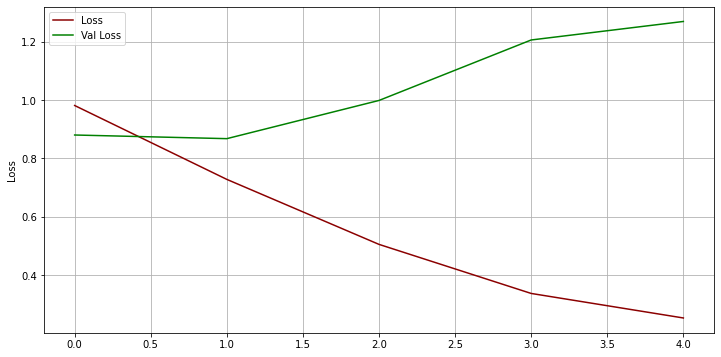

In [47]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

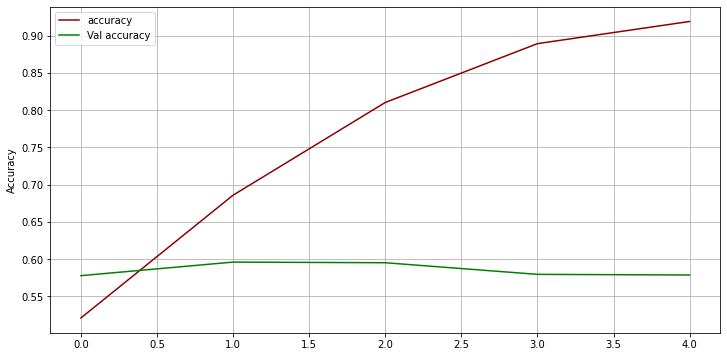

In [48]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## Conv 1D

In [85]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(32,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_test = one.fit_transform(Y_test.reshape(-1,1))

In [86]:
fit = model.fit(X_train, y_one, epochs=5 )

Epoch 1/5
253/253 [==============================] - 3s 13ms/step - loss: 0.9990 - accuracy: 0.4997
Epoch 2/5
253/253 [==============================] - 3s 13ms/step - loss: 0.7078 - accuracy: 0.6860
Epoch 3/5
253/253 [==============================] - 3s 13ms/step - loss: 0.3776 - accuracy: 0.8598
Epoch 4/5
253/253 [==============================] - 3s 12ms/step - loss: 0.1532 - accuracy: 0.9508
Epoch 5/5
253/253 [==============================] - 3s 11ms/step - loss: 0.0733 - accuracy: 0.9781


In [87]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_test, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1023
           1       0.46      0.40      0.43       910
           2       0.65      0.72      0.68      1527

    accuracy                           0.59      3460
   macro avg       0.57      0.56      0.56      3460
weighted avg       0.58      0.59      0.59      3460



In [55]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(32,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
82/82 [==============================] - 1s 16ms/step - loss: 1.0422 - accuracy: 0.4723 - val_loss: 0.9408 - val_accuracy: 0.5685
Epoch 2/5
82/82 [==============================] - 1s 15ms/step - loss: 0.8135 - accuracy: 0.6306 - val_loss: 0.8342 - val_accuracy: 0.6222
Epoch 3/5
82/82 [==============================] - 1s 16ms/step - loss: 0.5394 - accuracy: 0.7945 - val_loss: 0.9132 - val_accuracy: 0.5997
Epoch 4/5
82/82 [==============================] - 1s 15ms/step - loss: 0.3238 - accuracy: 0.8938 - val_loss: 1.0701 - val_accuracy: 0.6005
Epoch 5/5
82/82 [==============================] - 1s 16ms/step - loss: 0.1903 - accuracy: 0.9396 - val_loss: 1.2875 - val_accuracy: 0.5789
 
Iter:  2
 
Epoch 1/5
82/82 [==============================] - 2s 20ms/step - loss: 1.0439 - accuracy: 0.4729 - val_loss: 0.9359 - val_accuracy: 0.5919
Epoch 2/5
82/82 [==============================] - 1s 17ms/step - loss: 0.8286 - accuracy: 0.6156 - val_loss: 0.8538 - val_accuracy: 0.6

In [56]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.5788561701774597
 Fold: 1	 Ultimo valor acc: 0.5658578872680664
 Fold: 2	 Ultimo valor acc: 0.6152513027191162
 Fold: 3	 Ultimo valor acc: 0.620121419429779
 Fold: 4	 Ultimo valor acc: 0.591500461101532
 Fold: 5	 Ultimo valor acc: 0.5845620036125183
 Fold: 6	 Ultimo valor acc: 0.594969630241394
 Fold: 7	 Ultimo valor acc: 0.6331309676170349
 Fold: 8	 Ultimo valor acc: 0.5958369374275208
 Fold: 9	 Ultimo valor acc: 0.6114484071731567

 Média: 0.5991535186767578 	 Std: 0.019557582916706208


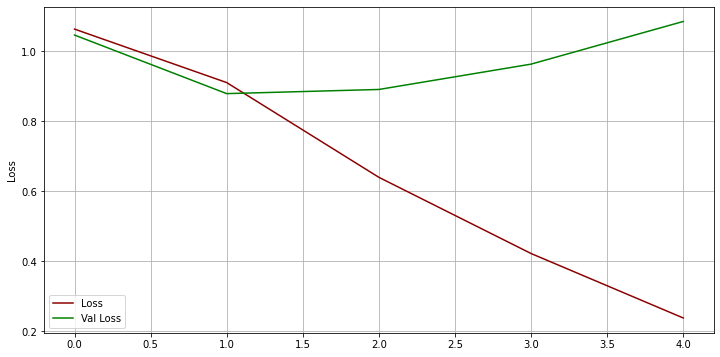

In [57]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

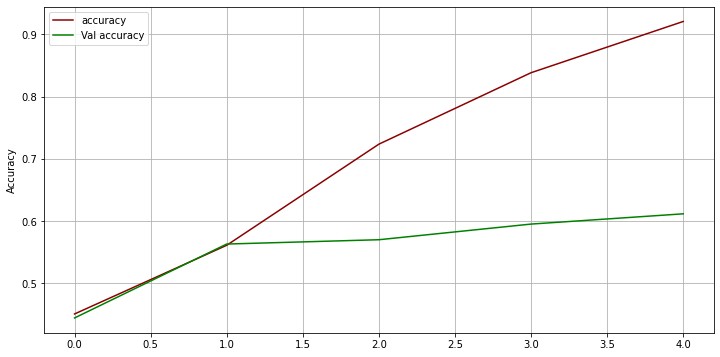

In [58]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## BDR

In [80]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=1,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))


In [81]:
X_train.shape

(8073,)

In [82]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=30 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/10
270/270 [==============================] - 5s 20ms/step - loss: 1.0769 - accuracy: 0.4446 - val_loss: 1.0593 - val_accuracy: 0.4653
Epoch 2/10
270/270 [==============================] - 3s 12ms/step - loss: 1.0510 - accuracy: 0.4479 - val_loss: 1.0289 - val_accuracy: 0.4702
Epoch 3/10
270/270 [==============================] - 4s 13ms/step - loss: 0.9562 - accuracy: 0.5049 - val_loss: 0.9415 - val_accuracy: 0.5113
Epoch 4/10
270/270 [==============================] - 3s 12ms/step - loss: 0.8075 - accuracy: 0.6039 - val_loss: 0.9217 - val_accuracy: 0.5332
Epoch 5/10
270/270 [==============================] - 3s 12ms/step - loss: 0.7032 - accuracy: 0.6632 - val_loss: 0.9445 - val_accuracy: 0.5405
Epoch 6/10
270/270 [==============================] - 3s 12ms/step - loss: 0.6259 - accuracy: 0.7051 - val_loss: 0.9895 - val_accuracy: 0.5445
Epoch 7/10
270/270 [==============================] - 3s 13ms/step - loss: 0.5700 - accuracy: 0.7315 - val_loss: 1.0357 - val_accuracy: 0.5370

In [83]:
y_one_test = one.fit_transform(Y_test.reshape(-1,1))

In [84]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_test, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.37      0.46      0.41       975
           1       0.38      0.32      0.35       875
           2       0.71      0.66      0.69      1610

    accuracy                           0.52      3460
   macro avg       0.49      0.48      0.48      3460
weighted avg       0.53      0.52      0.52      3460



In [73]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=1,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1)),

    tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=10, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/10
82/82 [==============================] - 3s 34ms/step - loss: 1.0828 - accuracy: 0.4442 - val_loss: 1.0597 - val_accuracy: 0.4723
Epoch 2/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0597 - accuracy: 0.4526 - val_loss: 1.0439 - val_accuracy: 0.4775
Epoch 3/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0391 - accuracy: 0.4606 - val_loss: 1.0333 - val_accuracy: 0.4835
Epoch 4/10
82/82 [==============================] - 1s 12ms/step - loss: 1.0020 - accuracy: 0.4876 - val_loss: 1.0269 - val_accuracy: 0.4853
Epoch 5/10
82/82 [==============================] - 1s 13ms/step - loss: 0.9497 - accuracy: 0.5422 - val_loss: 1.0240 - val_accuracy: 0.4853
Epoch 6/10
82/82 [==============================] - 1s 13ms/step - loss: 0.8960 - accuracy: 0.5838 - val_loss: 1.0377 - val_accuracy: 0.4775
Epoch 7/10
82/82 [==============================] - 1s 13ms/step - loss: 0.8472 - accuracy: 0.6092 - val_loss: 1.0604 - val_accuracy: 0.4697
Ep

82/82 [==============================] - 1s 12ms/step - loss: 0.7895 - accuracy: 0.6276 - val_loss: 1.1151 - val_accuracy: 0.5022
Epoch 9/10
82/82 [==============================] - 1s 12ms/step - loss: 0.7509 - accuracy: 0.6400 - val_loss: 1.1556 - val_accuracy: 0.4944
Epoch 10/10
82/82 [==============================] - 1s 13ms/step - loss: 0.7197 - accuracy: 0.6598 - val_loss: 1.1709 - val_accuracy: 0.4926
 
Iter:  7
 
Epoch 1/10
82/82 [==============================] - 3s 33ms/step - loss: 1.0872 - accuracy: 0.4489 - val_loss: 1.0754 - val_accuracy: 0.4614
Epoch 2/10
82/82 [==============================] - 1s 12ms/step - loss: 1.0694 - accuracy: 0.4513 - val_loss: 1.0629 - val_accuracy: 0.4614
Epoch 3/10
82/82 [==============================] - 1s 12ms/step - loss: 1.0571 - accuracy: 0.4513 - val_loss: 1.0514 - val_accuracy: 0.4614
Epoch 4/10
82/82 [==============================] - 1s 13ms/step - loss: 1.0318 - accuracy: 0.4584 - val_loss: 1.0285 - val_accuracy: 0.4744
Epoch 5/10

In [74]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.4705372750759125
 Fold: 1	 Ultimo valor acc: 0.6161178350448608
 Fold: 2	 Ultimo valor acc: 0.6065858006477356
 Fold: 3	 Ultimo valor acc: 0.594969630241394
 Fold: 4	 Ultimo valor acc: 0.5073720812797546
 Fold: 5	 Ultimo valor acc: 0.49262791872024536
 Fold: 6	 Ultimo valor acc: 0.4969644546508789
 Fold: 7	 Ultimo valor acc: 0.6322636604309082
 Fold: 8	 Ultimo valor acc: 0.5498698949813843
 Fold: 9	 Ultimo valor acc: 0.516045093536377

 Média: 0.5483353644609451 	 Std: 0.05632417757111513


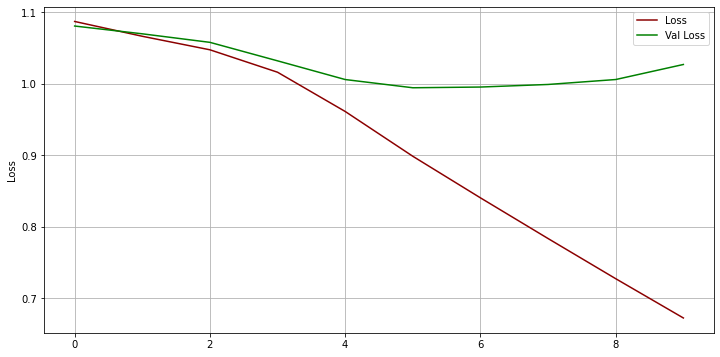

In [75]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

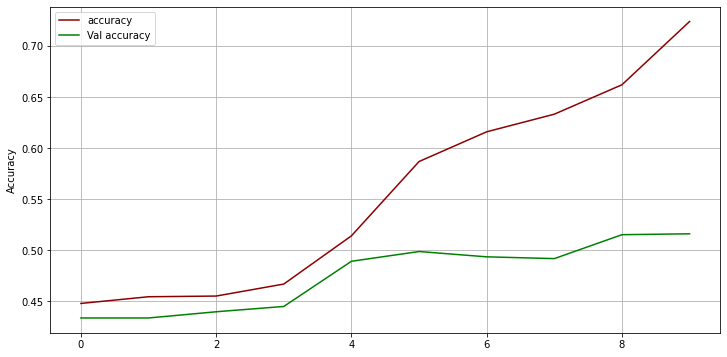

In [76]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [18]:
TextClassifier = ak.TextClassifier(
    num_classes=3, 
    multi_label=True, 
    loss=tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy'],
    project_name="text_classifier",
    max_trials=1,
    objective="val_loss"
)

fit = TextClassifier.fit(
    x=np.asarray(pre_X(X_train)), y=one.fit_transform(Y_train.reshape(-1,1)), epochs=10, validation_split=0.2, validation_data=(np.asarray(pre_X(X_test)),one.fit_transform(Y_test.reshape(-1,1)) )
)


INFO:tensorflow:Reloading Oracle from existing project .\text_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\text_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
253/253 [==============================] - 23s 92ms/step - loss: 0.5958 - accuracy: 0.4936 - val_loss: 0.5222 - val_accuracy: 0.5882
Epoch 2/10
253/253 [==============================] - 24s 95ms/step - loss: 0.4689 - accuracy: 0.6444 - val_loss: 0.5052 - val_accuracy: 0.6066
Epoch 3/10
253/253 [==============================] - 27s 107ms/step - loss: 0.3611 - accuracy: 0.7537 - val_loss: 0.5646 - val_accuracy: 0.5960
Epoch 4/10
253/253 [==============================] - 24s 94ms/step - loss: 0.2627 - accuracy: 0.8339 - val_loss: 0.6647 - val_accuracy: 0.5847
Epoch 5/10
253/253 [==============================] - 24s 95ms/step - loss: 0.1892 - accuracy: 0.8875 - val_loss: 0.7942 - val_accuracy: 0.5760
Epoch 6/10
253/253 [==============================] - 23s 92ms/step - loss: 0.1409 - accu